Fajar Zulmi Sopian

In [51]:
from google.colab import files
files.upload()

Saving ANTM.JK.csv to ANTM.JK (4).csv


{'ANTM.JK.csv': b'Date;Open;High;Low;Close;Adj Close;Volume\r\n29/09/05;432.588.074;436.787.964;407.388.763;432.588.074;304.904.572;76180670\r\n30/09/05;457.787.384;457.787.384;432.588.074;457.787.384;322.666.016;105493978\r\n03/10/05;470.387.024;474.586.914;440.987.854;470.387.024;331.546.692;59712955\r\n04/10/05;474.586.914;482.986.694;466.187.164;474.586.914;334.506.927;56236668\r\n05/10/05;482.986.694;482.986.694;466.187.164;482.986.694;340.427.429;31319315\r\n06/10/05;466.187.164;482.986.694;461.987.274;466.187.164;328.586.487;8107366\r\n07/10/05;470.387.024;470.387.024;457.787.384;470.387.024;331.546.692;6577562\r\n10/10/05;466.187.164;470.387.024;457.787.384;466.187.164;328.586.487;23223854\r\n11/10/05;466.187.164;466.187.164;461.987.274;466.187.164;328.586.487;13497395\r\n12/10/05;470.387.024;474.586.914;466.187.164;470.387.024;331.546.692;29804392\r\n13/10/05;474.586.914;474.586.914;470.387.024;474.586.914;334.506.927;12738446\r\n14/10/05;474.586.914;474.586.914;470.387.024;47

In [107]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [108]:
df = pd.read_csv('ANTM.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [109]:
df = df.dropna(axis='rows' )

In [110]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

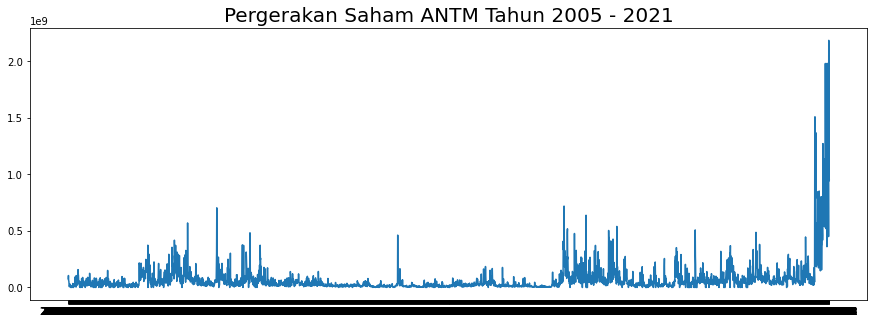

In [111]:
Date = df['Date'].values
Volume = df['Volume'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(Date , Volume)
plt.title('Pergerakan Saham ANTM Tahun 2005 - 2021',
          fontsize=20);

In [113]:
from sklearn.model_selection import train_test_split
Date_train, Date_test, Volume_train, Volume_test = train_test_split(Date, Volume, test_size=0.2)

In [114]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [115]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [116]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')is not None and logs.get('mae') <= mae_terkecil):
      print("\nMAE dibawah ", mae_terkecil , ", train data diberhentikan !")
      self.model.stop_training = True

callbacks = myCallback()

In [119]:
train_test_split = windowed_dataset(Volume_train, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [120]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_test_split,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
30/30 [==============================] - 7s 104ms/step - loss: 70687392.0000 - mae: 70687392.0000
Epoch 2/100
30/30 [==============================] - 3s 102ms/step - loss: 70687384.0000 - mae: 70687384.0000
Epoch 3/100
30/30 [==============================] - 3s 101ms/step - loss: 70687384.0000 - mae: 70687384.0000
Epoch 4/100
30/30 [==============================] - 3s 102ms/step - loss: 70687400.0000 - mae: 70687400.0000
Epoch 5/100
30/30 [==============================] - 3s 102ms/step - loss: 70687400.0000 - mae: 70687400.0000
Epoch 6/100
30/30 [==============================] - 3s 102ms/step - loss: 70687384.0000 - mae: 70687384.0000
Epoch 7/100
30/30 [==============================] - 3s 101ms/step - loss: 70687384.0000 - mae: 70687384.0000
Epoch 8/100
30/30 [==============================] - 3s 102ms/step - loss: 70687384.0000 - mae: 70687384.0000
Epoch 9/100
30/30 [==============================] - 3s 101ms/step - loss: 70687368.0000 - mae: 70687376.0000
Epoch 10/1

In [121]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, None, 60)          14880     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 46,071
Trainable params: 46,071
Non-trainable params: 0
_________________________________________________________________


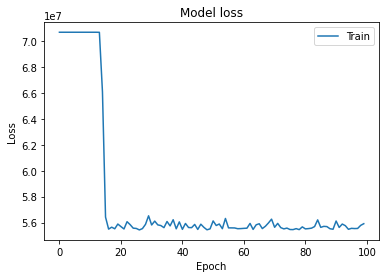

In [122]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

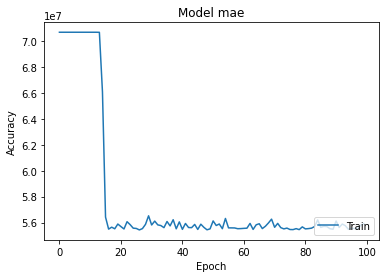

In [123]:
plt.plot(history.history['mae'])
plt.title('Model mae')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()